In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import csv file data

In [2]:
df = pd.read_csv('data/stud.csv')

show top 5 of data records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

check missing value

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

check duplicate

In [6]:
df.duplicated().sum()

0

check data types

In [7]:
#check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking the no. of unique value of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

check the statistics of data

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


exploring data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("categories in 'gender' variables:    ",end=" ")
print(df['gender'].unique())

print("categories in 'race_etnicity' variables:     ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variables    ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variables     ",end=" ")
print(df['lunch'].unique())

print("categories in 'test_preparation_course' variables:    ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variables:     ['female' 'male']
categories in 'race_etnicity' variables:      ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variables     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variables      ['standard' 'free/reduced']
categories in 'test_preparation_course' variables:     ['none' 'completed']


In [12]:
#numeric and categorical
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print ("we have {} numerical features : {}".format(len(numeric_features), numeric_features))

print("we have {} categorical features : {}".format(len(categorical_features),categorical_features))



we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


CREATING total score and average column as depedent variable 

In [13]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
math_full = df[df['math_score']==100]['average'].count()
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()

print('no. of stud full marks in math is',(math_full))
print('no. of stud full marks in reading is',(reading_full))
print('no. of stud full marks in writing is',(writing_full))

no. of stud full marks in math is 7
no. of stud full marks in reading is 17
no. of stud full marks in writing is 14


In [22]:
math_less = df[df['math_score']<=20]['average'].count()
reading_less = df[df['reading_score']<=20]['average'].count()
writing_less = df[df['writing_score']<=20]['average'].count()

print("no. of stud less than 20 marks in math is",(math_less))
print('no. of stud less than 20 marks in reading is',(reading_less))
print('no. of stud less than 20 marks in writing is',(writing_less))

no. of stud less than 20 marks in math is 4
no. of stud less than 20 marks in reading is 1
no. of stud less than 20 marks in writing is 3


data visualization

<Axes: xlabel='average', ylabel='Count'>

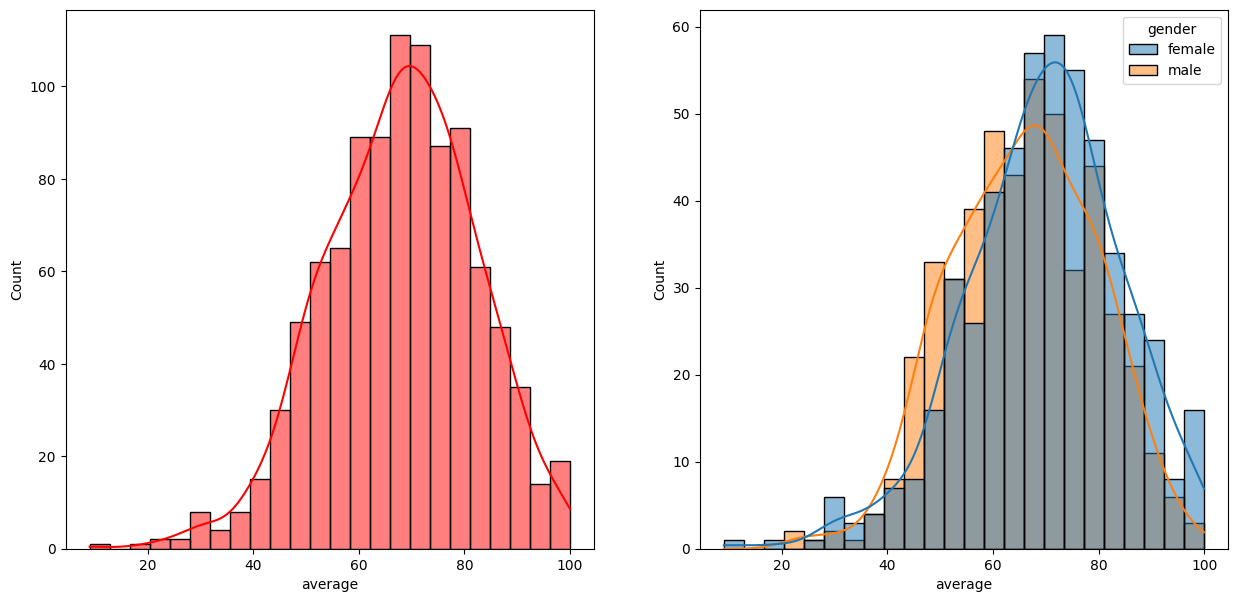

In [41]:
fig, axs=plt.subplots(1,2 , figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')


<Axes: xlabel='total score', ylabel='Count'>

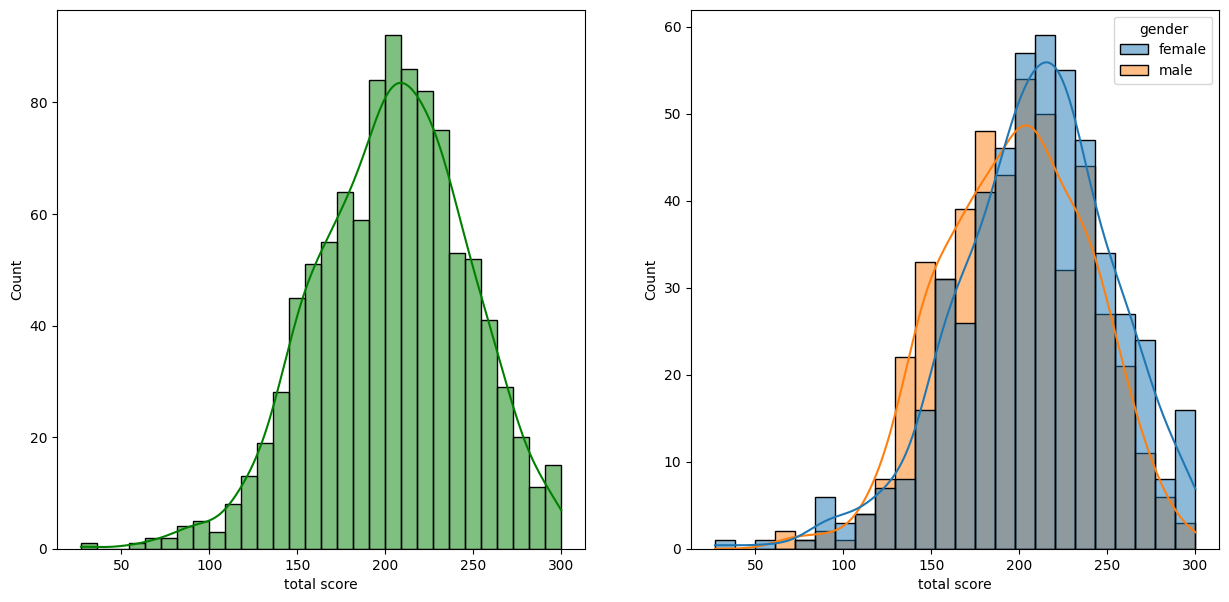

In [61]:
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',kde=True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')

Text(0.5, 1.0, 'male')

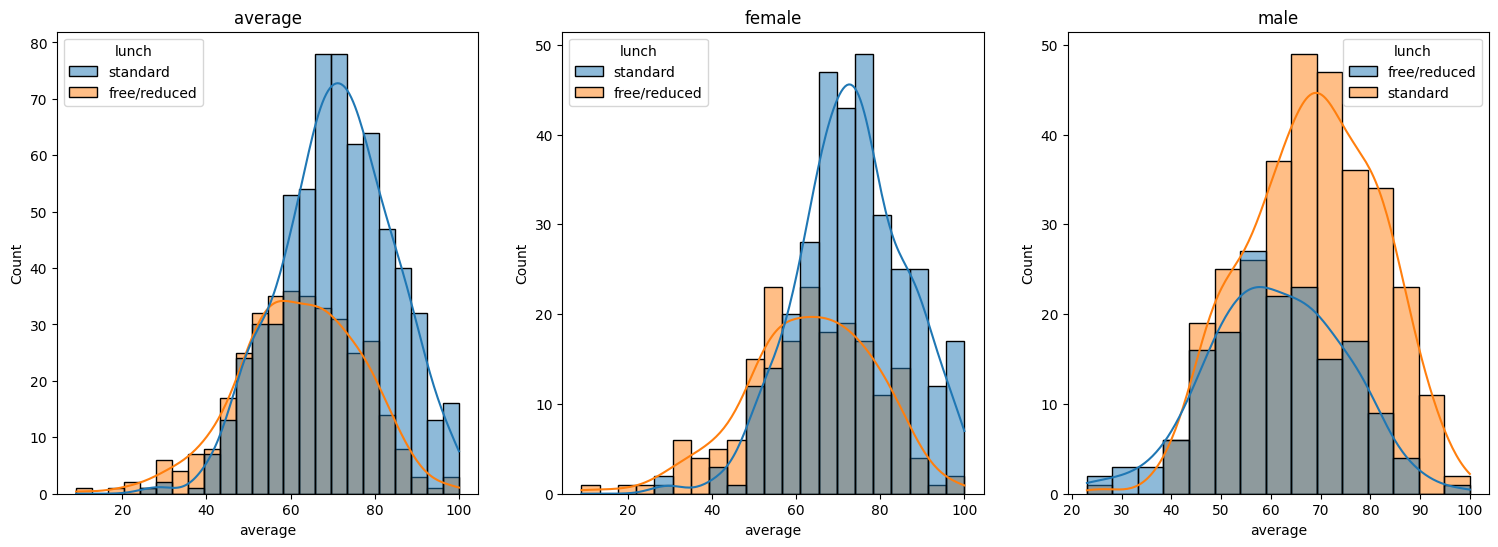

In [70]:
fig, axs =plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title('average')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title('female')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title('male')

Text(0.5, 1.0, 'male')

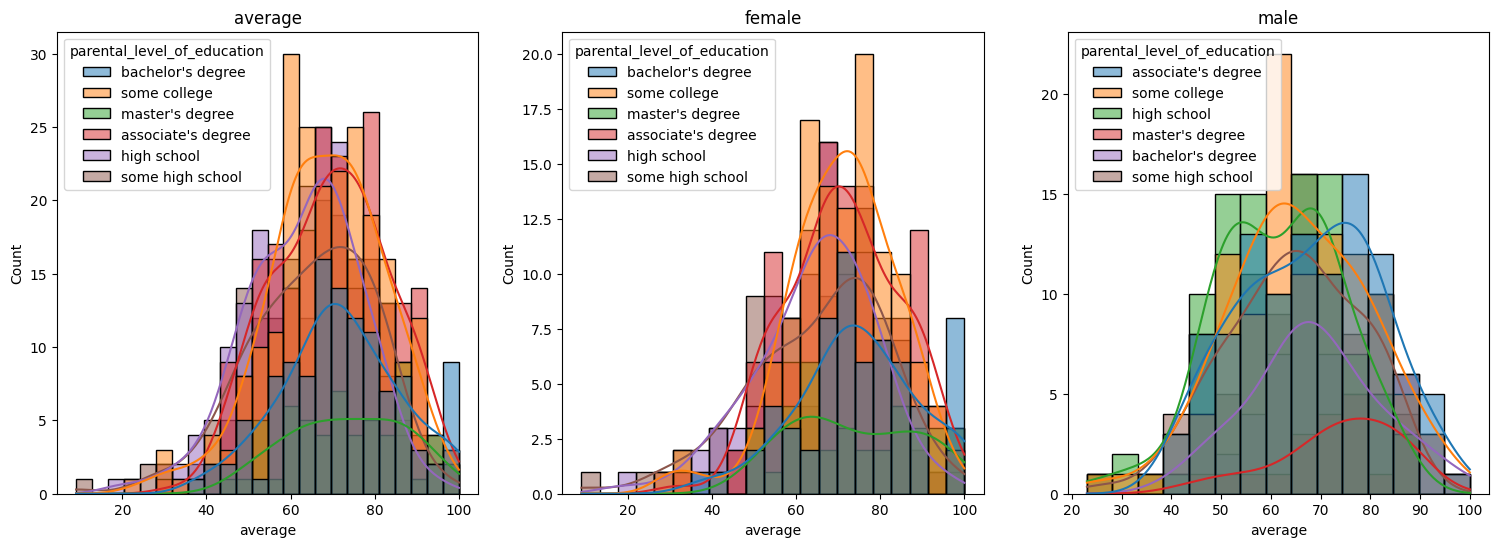

In [68]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.title('average')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title('female')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title('male')


Text(0.5, 1.0, 'male')

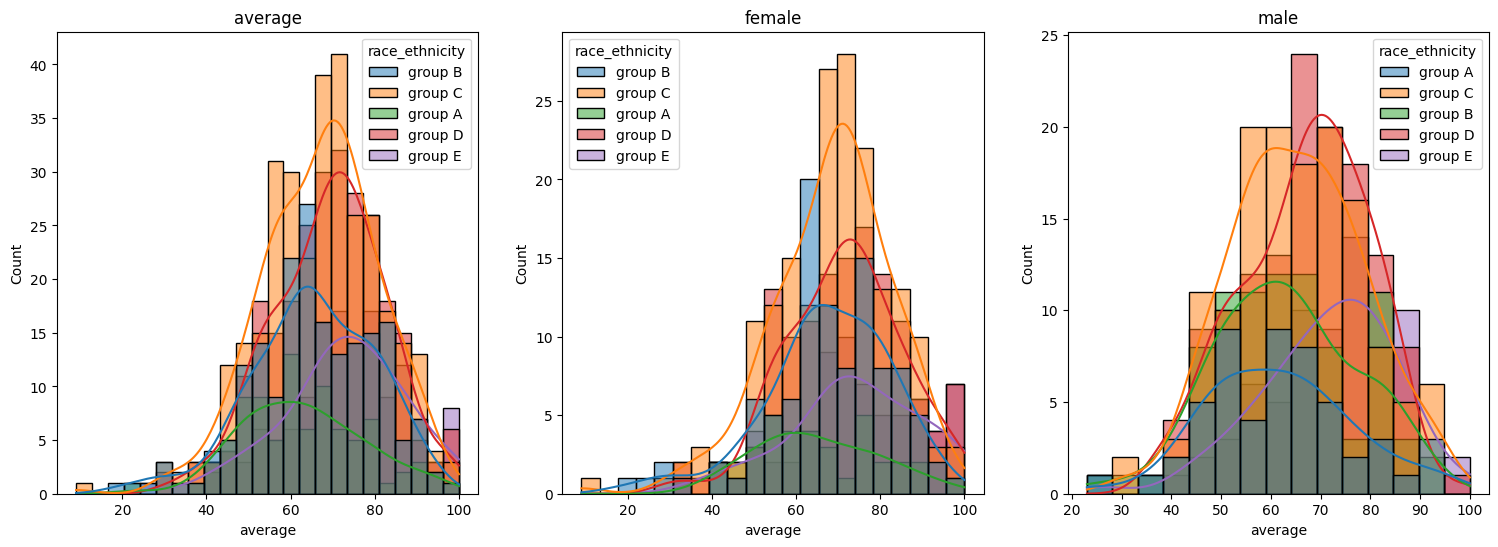

In [69]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.title('average')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.title('female')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title('male')

maximum score of stud in all 3 subj

Text(0.5, 1.0, 'reading score')

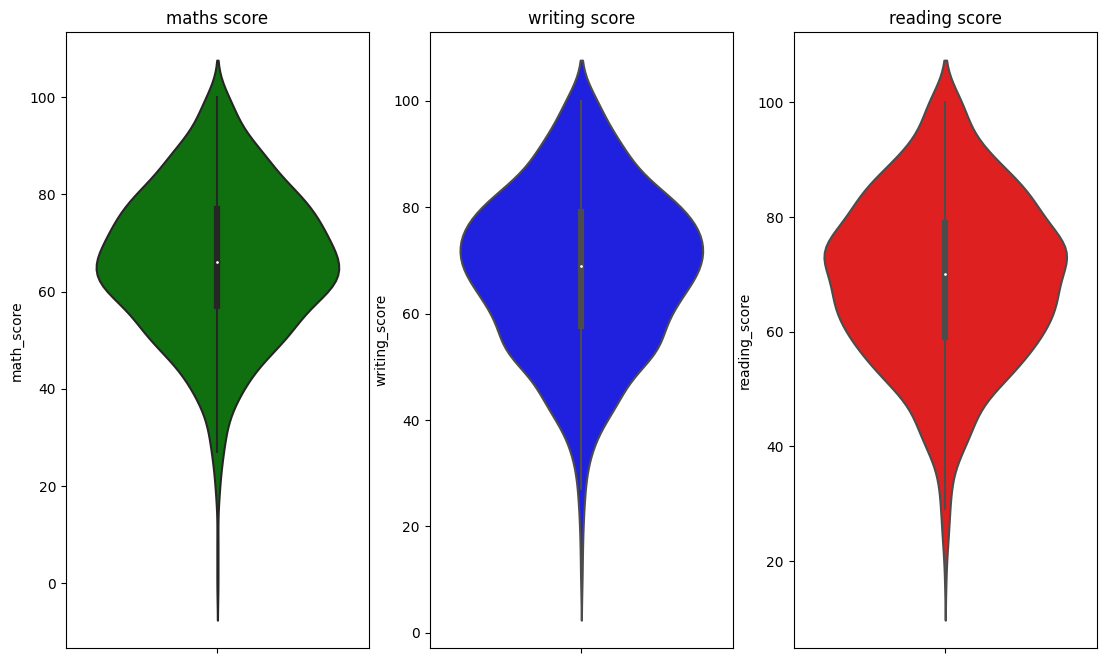

In [83]:
plt.figure(figsize=(18,8))
plt.subplot(141)
sns.violinplot(data=df,y='math_score',color='g')
plt.title('maths score')
plt.subplot(142)
sns.violinplot(data=df,y='writing_score',color='b')
plt.title('writing score')
plt.subplot(143)
sns.violinplot(data=df,y='reading_score',color='r')
plt.title('reading score')